# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
plt.style.use('fivethirtyeight')
import datetime
from dateutil import relativedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("bike-sharing_hourly.csv", index_col=False)
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Checking for Missing Values
- There are no missing values for any of the columns

In [3]:
data.isna().astype(int).sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Dealing with Datatypes
- Change `dteday` to "datetime" + create `day` of month variable
- Set `dteday` as index

In [4]:
# Change datatype
data['dteday'] = data['dteday'].astype('datetime64[ns]')
# New 'day' variable
data['day'] = data.dteday.dt.day
# Set 'dteday' as index
data = data.set_index('dteday')

data.head()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


- Define categorical and numerical variables

In [5]:
categorical_variables = ["season", "holiday", "workingday", "weathersit", "yr", "mnth", "day","hr",'weekday']
numerical_variables = ["temp", "atemp", "hum", "windspeed"]

### Dealing with Outliers

- Outliers in the `cnt` of bikes

In [6]:
# Distribution for "cnt" values
px.box(data, y="cnt")

There are values of `cnt` that lie well above the average.

In [7]:
# Checking values above 3rd + IQR * 1.5
IQR = data.cnt.quantile(0.75) - data.cnt.quantile(0.25)
upper_fence = data.cnt.quantile(0.75) + (IQR * 1.5)
outliers = data[data["cnt"] > upper_fence]
print(f"These values represent {round((len(outliers)/len(data))*100, ndigits=2)}% of the total data")

These values represent 2.91% of the total data


In [8]:
outliers

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,,,
2011-08-23,5537,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651,23
2012-03-12,10359,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644,12
2012-03-12,10360,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712,12
2012-03-13,10383,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676,13
2012-03-13,10384,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-11,16886,4,1,12,8,0,2,1,2,0.34,0.3030,0.61,0.2985,16,708,724,11
2012-12-12,16910,4,1,12,8,0,3,1,2,0.26,0.2576,0.65,0.1642,18,670,688,12
2012-12-13,16934,4,1,12,8,0,4,1,1,0.24,0.2273,0.60,0.1940,24,655,679,13


We can see that the outliers are not only from certain month or hour and its percentage share from the total data is very low. We choose to remove those.

In [9]:
# Removing the outliers
data = data.loc[data.cnt <= upper_fence, :]

**Note**: Since `tem`, `atemp`, `hum`, `windspeed` are already normalized, is not as easy to detect outliers in these continuous variables, so we will keep all values for now

### Data Exploration

- Define a DataFrame (dfUser) to plot analysis between `userType`
- Each instant is duplicated for casual/registerd users where `cnt` corresponds to the number of users of each type

In [10]:
dfCasual = data.copy().reset_index()
dfCasual['userType'] = 'casual'
dfReg = data.copy().reset_index()
dfReg['userType'] = 'registered'
dfUser = pd.merge(dfCasual, dfReg, how='outer')
dfUser.loc[dfUser.userType == 'casual', 'cnt'] = dfUser['casual']
dfUser.loc[dfUser.userType == 'registered', 'cnt'] = dfUser['registered']
dfUser = dfUser.drop(['casual','registered'], axis=1)
dfUser.sort_values(by='instant').head(4)


,dteday,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,userType
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,1,casual
16874,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,1,registered
16875,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,registered
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,1,casual


1. Evolution of total bikes per day segmented by User Type

In [11]:
px.histogram(dfUser, x='dteday', y="cnt", color='userType', title='Total Bikes per Day - Segmented by User Type')

2. Exploring **categorical** variables
- Average usage of bikes for categorical variables

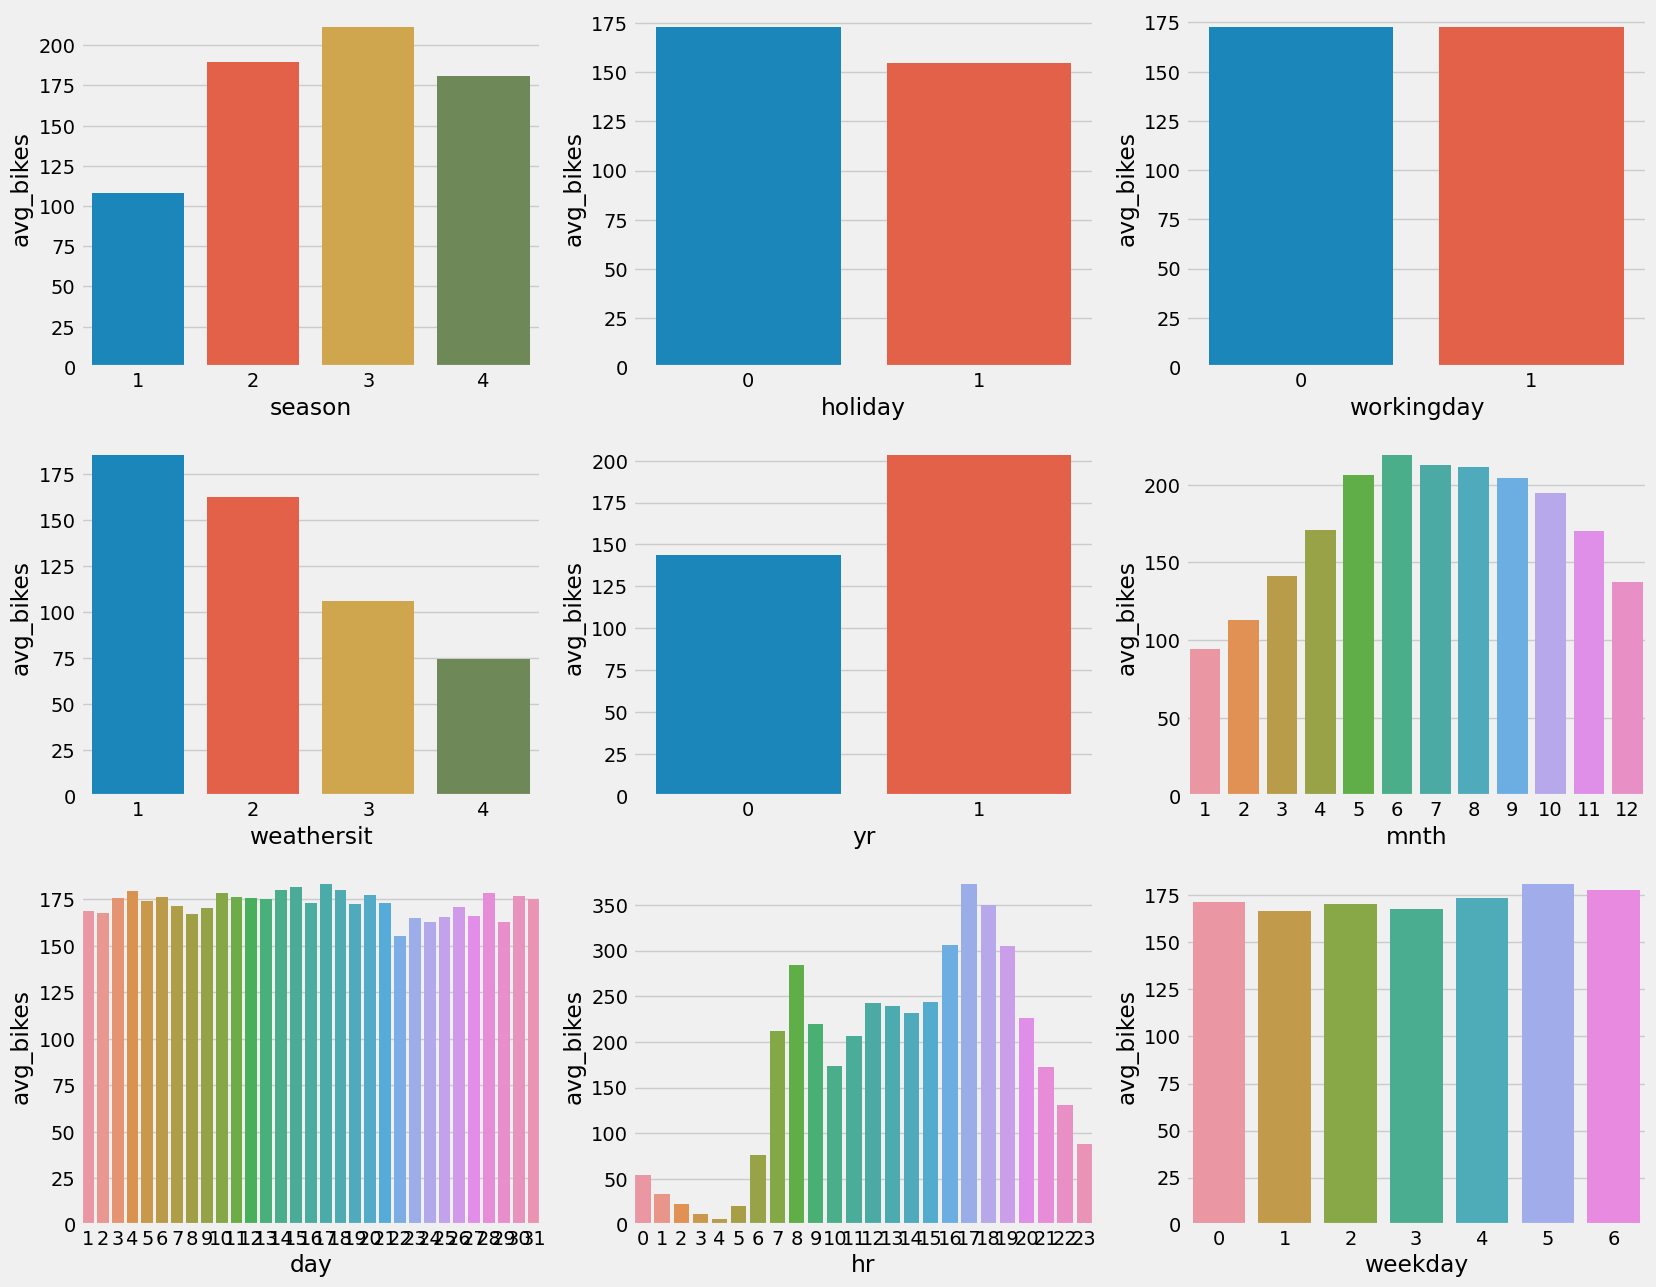

In [12]:
fig, ax = plt.subplots(3,3, figsize=(18,15))

for i in range(len(categorical_variables)):
    var = categorical_variables[i]
    sns.barplot(ax=ax[int(i/3),i-int(i/3)*3], data=data.groupby(var,as_index=False)["cnt"].mean().rename({"cnt":"avg_bikes"},axis=1), x=var, y="avg_bikes")

3. Exploring **numerical** variables
- Average usage of bikes continuous variables

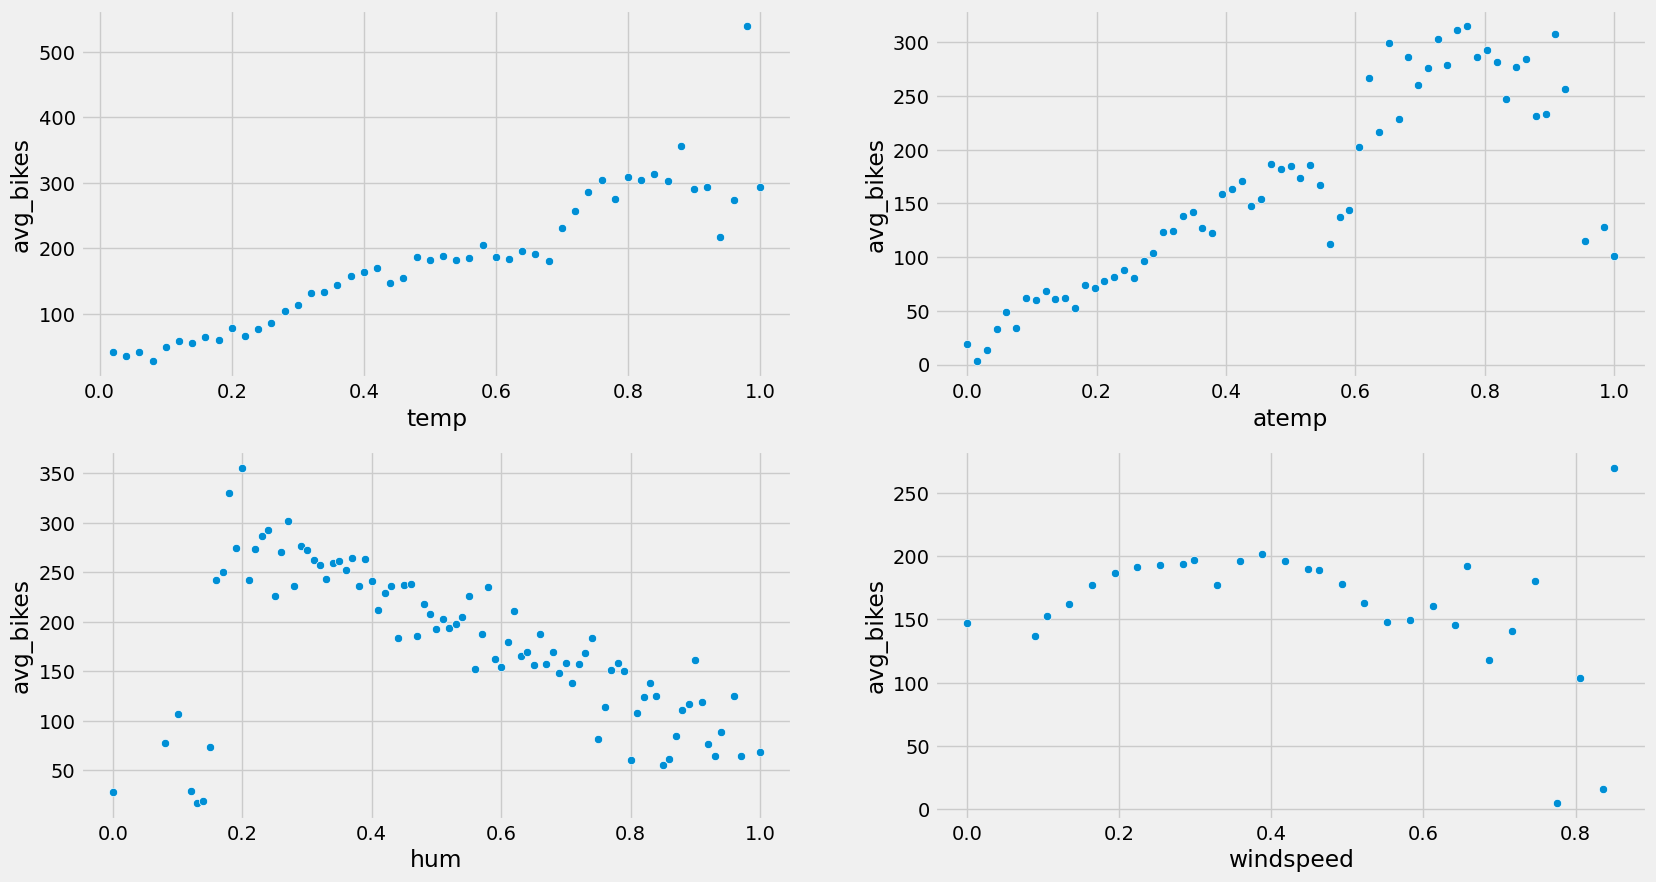

In [13]:
fig, ax = plt.subplots(2,2, figsize=(18,10))

for i in range(len(numerical_variables)):
    var = numerical_variables[i]
    sns.scatterplot(ax=ax[int(i/2),i-int(i/2)*2], data=data.groupby(var,as_index=False)["cnt"].mean().rename({"cnt":"avg_bikes"},axis=1), x=var, y="avg_bikes")

4. Analysing **hourly** trend, segmenting wether is a working day or not

In [14]:
peakhour = data.groupby(["hr","workingday"], as_index=False)["cnt"].mean()
px.line(peakhour, x='hr', y="cnt", color='workingday', markers=True)

From this chart we see a clear division in day hours, so we will create a new variable `dayInstant`:
- 'morning' : 6-9h
- 'midday' : 10-17h
- 'afternoon' : 18-21h
- 'night' : 22-5h

In [15]:
def dayInstant(hr):
    if 6 <= hr and hr <= 9: return 'morning'
    elif 10 <= hr and hr <= 17: return 'midday'
    elif 18 <= hr and hr <= 21: return 'afternoon'
    else: return 'night'

data['dayInstant'] = data['hr'].apply(lambda x: dayInstant(x))
dfUser['dayInstant'] = dfUser['hr'].apply(lambda x: dayInstant(x))

5. Analysing **weekday** trend, segmenting by userType (excluding special holidays)

In [16]:
weekly = dfUser.loc[dfUser.holiday == 0,:].groupby(["weekday","userType"], as_index=False)["cnt"].mean()
px.bar(weekly, x='weekday', y="cnt", color='userType')

### Feature Engineering

Percentage bikes that are registered over total cnt.
- `pct_registered` = `registered` / `cnt`
- From the plots we see that `pct_registered` changes significantly according to some of the categorical variables like `mnth`, `hr`, or `workingday`
- To use this feature in the model we will aggregate it on a "hourly" and "monthly" basis

In [17]:
data['pct_registered'] = data['registered']/data['cnt']

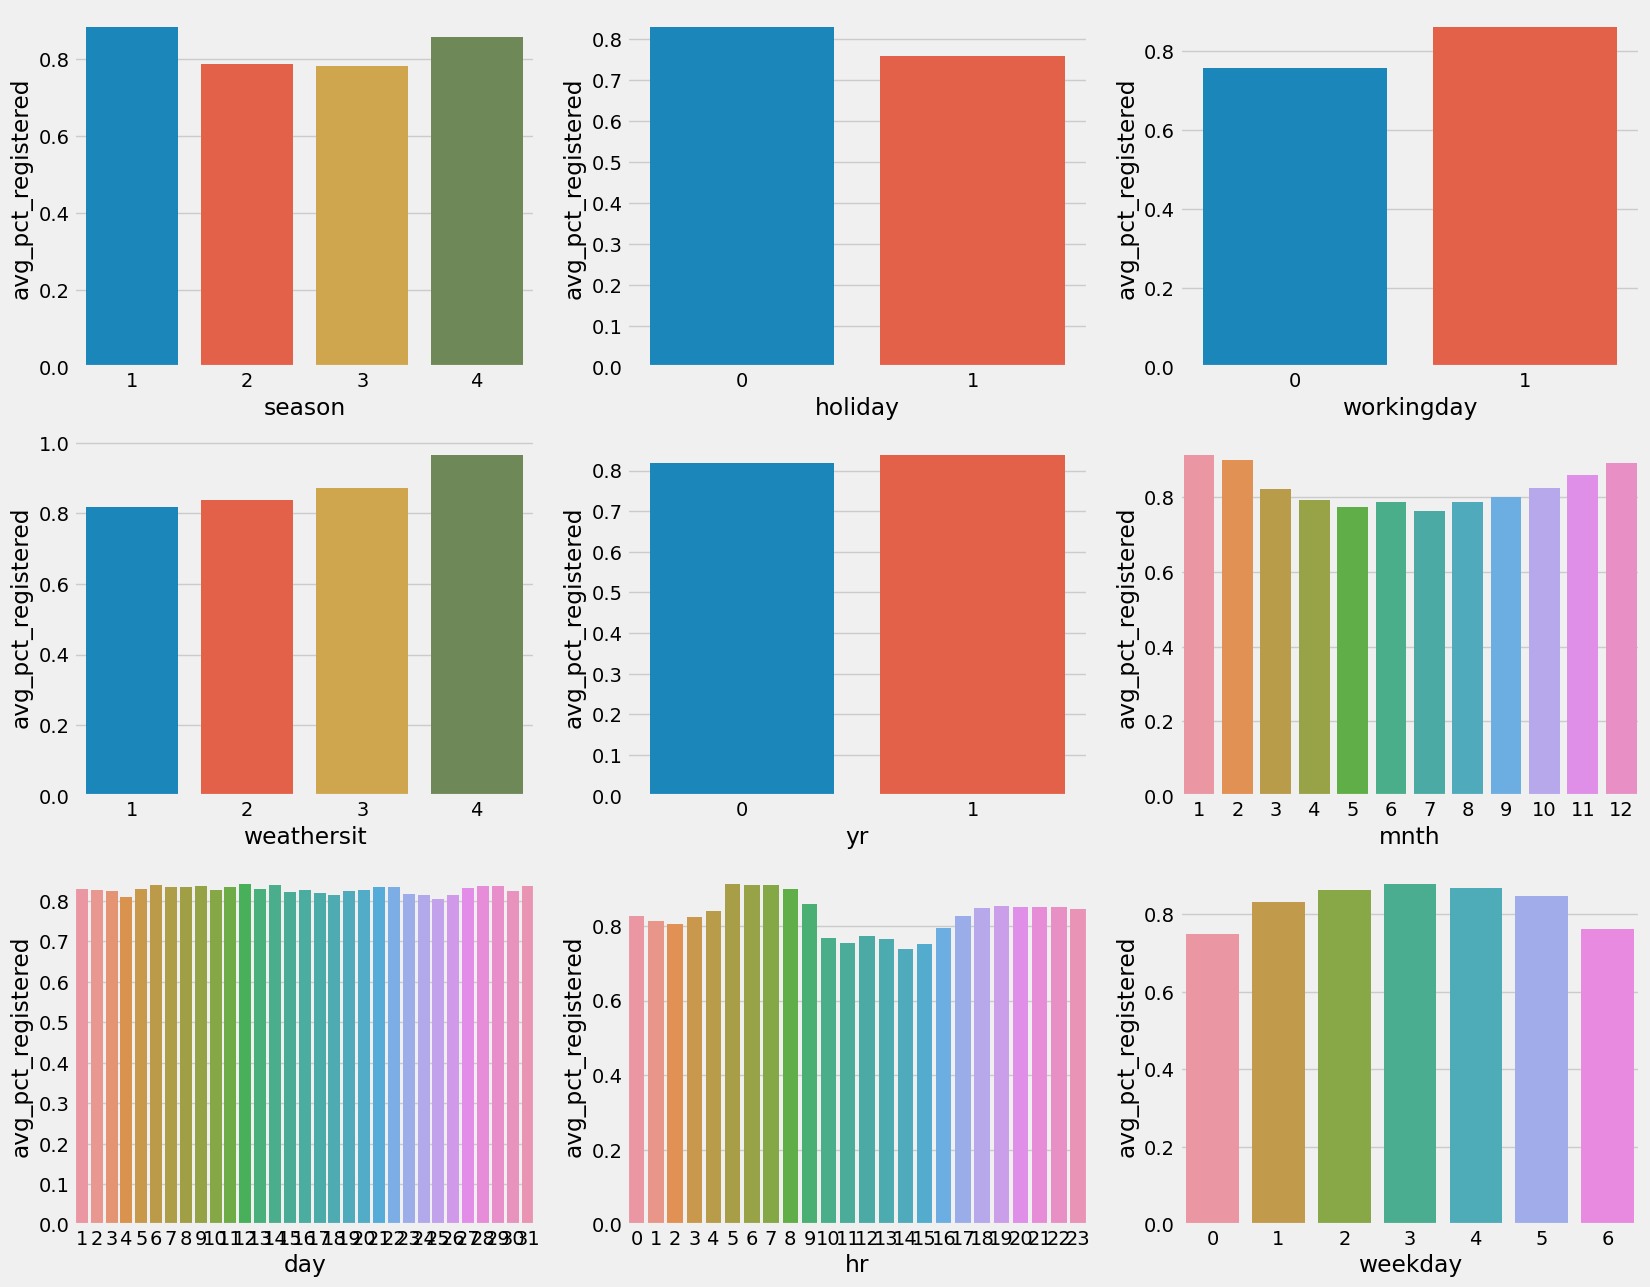

In [18]:
fig, ax = plt.subplots(3,3, figsize=(18,15))

for i in range(len(categorical_variables)):
    var = categorical_variables[i]
    sns.barplot(ax=ax[int(i/3),i-int(i/3)*3], data=data.groupby(var,as_index=False)["pct_registered"].mean().rename({"pct_registered":"avg_pct_registered"},axis=1), x=var, y="avg_pct_registered")

In [19]:
# Aggregating and add feature
pct_registered_hourly = data.groupby('hr')['pct_registered'].mean().to_dict()
data['pct_registered_hourly'] = data['hr'].map(pct_registered_hourly)

pct_registered_monthly = data.groupby('mnth')['pct_registered'].mean().to_dict()
data['pct_registered_monthly'] = data['mnth'].map(pct_registered_monthly)

Night and Day variable
- During the "day" light hour there are many more bike rentals.

In [20]:
data["day_night"] = data['hr'].apply(lambda x: 1 if x >= 7 and x <= 23 else 0)
data.groupby('day_night')['cnt'].mean()

day_night
0     32.321736
1    231.842837
Name: cnt, dtype: float64

### Multivariate Analysis

Checking **Correlation** for numerical variables (pearson correlation)
- We produce "PolynomialFeatures" up to 2nd degree to see variable interaction 

In [21]:
from sklearn.preprocessing import PolynomialFeatures
correlation = data.loc[:,[
    'temp',
    'atemp',
    'hum',
    'windspeed',
]]

poly = PolynomialFeatures(2)
correlation = pd.DataFrame(poly.fit_transform(correlation), columns=poly.get_feature_names_out(correlation.columns)).drop(['1'], axis=1)
correlation['cnt'] = data.reset_index().loc[:,'cnt']
correlation.head(2)

,temp,atemp,hum,windspeed,temp^2,temp atemp,temp hum,temp windspeed,atemp^2,atemp hum,atemp windspeed,hum^2,hum windspeed,windspeed^2,cnt
0,0.24,0.2879,0.81,0.0,0.0576,0.069096,0.1944,0.0,0.082886,0.233199,0.0,0.6561,0.0,0.0,16
1,0.22,0.2727,0.80,0.0,0.0484,0.059994,0.1760,0.0,0.074365,0.218160,0.0,0.6400,0.0,0.0,40


In [22]:
correlation.corr()['cnt'].sort_values(ascending=False)

cnt                1.000000
temp               0.401579
atemp              0.398330
temp^2             0.397088
temp atemp         0.396587
atemp^2            0.394437
temp windspeed     0.309070
atemp windspeed    0.305103
windspeed          0.097801
temp hum           0.071052
windspeed^2        0.067995
atemp hum          0.053689
hum windspeed     -0.053692
hum               -0.326973
hum^2             -0.328915
Name: cnt, dtype: float64

In [23]:
correlation = correlation.corr().sort_values('cnt', ascending=False)
zz = np.array(correlation)
fig = ff.create_annotated_heatmap(
    zz,
    x = list(correlation.columns),
    y = list(correlation.index),
    annotation_text = np.around(zz, decimals=2),
    hoverinfo='z',
    colorscale='RdBu'
)

fig.update_layout(
    height=800,
    width = 800
)

In [24]:
data['temp*windspeed'] = data['temp']*data['windspeed']
data['hum^2'] = np.square(data['hum'])

Checking **Correlation** for categorical variables (anova)


In [25]:
from pandas import array
from sklearn.feature_selection import f_classif
corrAnova = data.loc[:,[
    'season',
    'mnth',
    'hr',
    'holiday',
    'weekday',
    'workingday',
    'weathersit',
    'dayInstant',
    'day_night'
]]

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
corrAnova['dayInstant'] = enc.fit_transform(corrAnova['dayInstant'].array.reshape(-1, 1))

lcorr = list(zip(corrAnova.columns, f_classif(corrAnova, data.cnt)[0]))
lcorr = pd.DataFrame(lcorr, columns=['feature','importance']).sort_values(by='importance', ascending=False)
px.bar(lcorr, x='feature', y='importance')



## PART II: Prediction Model

### Data Preparation

In [26]:
X = data.loc[:,[
    'season',
    'mnth',
    'hr',
    'holiday',
    'weekday',
    'workingday',
    'weathersit',
    'temp',
    'hum^2',
    'windspeed',
    'temp*windspeed',
    'dayInstant',
    'day_night',
    'pct_registered_hourly',
    'pct_registered_monthly'
]]
y = data.loc[:,['cnt']]

# converting categorical values into dummy values
X = pd.get_dummies(X, columns=['season','mnth','weekday','weathersit','dayInstant'])

### Splitting Data
- Even if you use CV we will keep a test split to calculate performance metrics
- Given this is a regression model, our main metric will be **MAE**

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### Base Model: Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

reg1 = LinearRegression().fit(X_train,y_train)
print(f"MAE from TestSet: {mean_absolute_error(y_test, reg1.predict(X_test))}")


MAE from TestSet: 76.4729243577626


### Decision Tree Regression (Trying)

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# create a Decision Tree Regression model
tree_reg = DecisionTreeRegressor(random_state=3)

# fit the model on the training data
tree_reg.fit(X_train, y_train)

# make predictions on the test data
y_pred = tree_reg.predict(X_test)

# calculate the mean absolute error of the predictions
mae = mean_absolute_error(y_test, y_pred)

# calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

print(f"MAE from TestSet: {mae}")
print(f"R-squared from TestSet: {r2}")



MAE from TestSet: 50.16936598854434
R-squared from TestSet: 0.7407195091963601


### Linear Regression (trying)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Train the model
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Compute the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Compute the R^2 score
r2 = r2_score(y_test, y_pred)

print(f"MAE from TestSet: {mae}")
print(f"R^2 score from TestSet: {r2}")

MAE from TestSet: 76.4729243577626
R^2 score from TestSet: 0.5644290961854526


### Logistic Regression (trying)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the logistic regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.015998419909144777


### RandomForestRegressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from ray.tune.sklearn import TuneGridSearchCV

param_grid2 = {
    'max_depth':[10,12,14,15,16,18],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,5,6],
    'min_samples_split': [2,3,4],
    'min_weight_fraction_leaf': [0.0],
    'n_estimators': [100],
    'random_state': [3],
    'verbose': [0],
}

tune_search2 = TuneGridSearchCV(
    RandomForestRegressor(), param_grid2, cv=3, max_iters=10, scoring='neg_mean_absolute_error', verbose=0
)
tune_search2.fit(X_train, y_train.values.ravel())
print(f"Model Best score (negative): {tune_search2.best_score_}")
print(f"MAE from TestSet: {mean_absolute_error(y_test, tune_search2.predict(X_test))}")


ModuleNotFoundError: 

### XGBoost

In [ ]:
from xgboost import XGBRegressor

param_grid3 = {
    'n_estimators': [100,120],
    'max_depth':[8,9,10,15],
    'learning_rate':[0.1,0.15,0.20],
    }

tune_search3 = TuneGridSearchCV(
    XGBRegressor(), param_grid3, cv=3, max_iters=10, scoring='neg_mean_absolute_error', verbose=0
)
tune_search3.fit(X_train, y_train.values.ravel())
print(f"Model Best score (negative): {tune_search3.best_score_}")
print(f"MAE from TestSet: {mean_absolute_error(y_test, tune_search3.predict(X_test))}")

ModuleNotFoundError: No module named 'xgboost'

### Plotting Predictions
- Available dates '2011-01-01' -> '2012-12-31'

In [ ]:
dateStart = '2011-05-02'
dateEnd = '2011-05-6'

xPred = X.loc[(X.index >= dateStart) & (X.index <= dateEnd),:]
pred = tune_search3.predict(xPred)

yReal = y.loc[(X.index >= dateStart) & (X.index <= dateEnd),:]
yReal['pred'] = pred
yReal = yReal.reset_index()
yReal['dteday'] = yReal['dteday'] + pd.to_timedelta(xPred.reset_index().hr, unit='h')

predictionPlot = pd.melt(yReal.reset_index(), id_vars=['dteday'], value_vars=['cnt','pred'])

px.line(predictionPlot, x='dteday', y='value', color='variable')


In [ ]:
#reg.save_model('BikeDemand_regression_model.json')